Student grades prediction

Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Above Dataframe we having 41 Courses with their Seat No.
CGPA distinguish every student with their performance

In [101]:
print("Total number of students : ",len(df))

Total number of students :  571


# Data Description

In [102]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [103]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

##### There are many Null Values so we'll replace Nan Values with mean so the data will be more suitable.

In [104]:
print("The courses are as follows : ",df.columns)

The courses are as follows :  Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [105]:
df.isnull().any()

Seat No.     False
PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CS-403        True
CS-421        True
CS-406        True
CS-414        True
CS-419        True
CS-423        True
CS-412        True
CGPA         False
dtype: bool

# Filling tha null values | Converts the Grades into numerical range

In [106]:
grade_to_num = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'F': 0.0
}


for column in df.columns:
    if column not in ['Seat No.', 'CGPA']:
        df[column] = df[column].map(grade_to_num)

df.fillna(df.mean(), inplace=True)

print(df)

     Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001     2.7     1.3     1.7        2.0     1.7     1.3     1.0   
1    CS-97002     4.0     1.0     1.3        1.0     2.7     2.0     1.0   
2    CS-97003     4.0     3.0     4.0        2.7     3.3     4.0     2.7   
3    CS-97004     1.0     2.3     1.3        1.0     1.0     3.7     1.3   
4    CS-97005     3.7     3.7     3.7        3.3     4.0     4.0     3.7   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567     3.0     4.0     4.0        3.7     4.0     4.0     3.7   
567  CS-97568     4.0     4.0     4.0        4.0     4.0     4.0     4.0   
568  CS-97569     3.0     4.0     3.7        3.3     4.0     4.0     4.0   
569  CS-97570     4.0     3.3     1.0        4.0     1.0     1.3     2.7   
570  CS-97571     2.0     1.0     1.0        2.0     2.0     1.3     3.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       1.7

#### The conversion are as follows
'A+': 4.0
'A': 4.0 
'A-': 3.7,
'B+': 3.3 
'B': 3.0
'B-': 2.7,
'C+': 2.3 
'C': 2.0 
'C-': 1.7
'D+': 1.3 
'D': 1.0
'F': 0.0

In [107]:
df.isnull().any()

Seat No.     False
PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
HS-205/20    False
MT-222       False
EE-222       False
MT-224       False
CS-210       False
CS-211       False
CS-203       False
CS-214       False
EE-217       False
CS-212       False
CS-215       False
MT-331       False
EF-303       False
HS-304       False
CS-301       False
CS-302       False
TC-383       False
MT-442       False
EL-332       False
CS-318       False
CS-306       False
CS-312       False
CS-317       False
CS-403       False
CS-421       False
CS-406       False
CS-414       False
CS-419       False
CS-423       False
CS-412       False
CGPA         False
dtype: bool

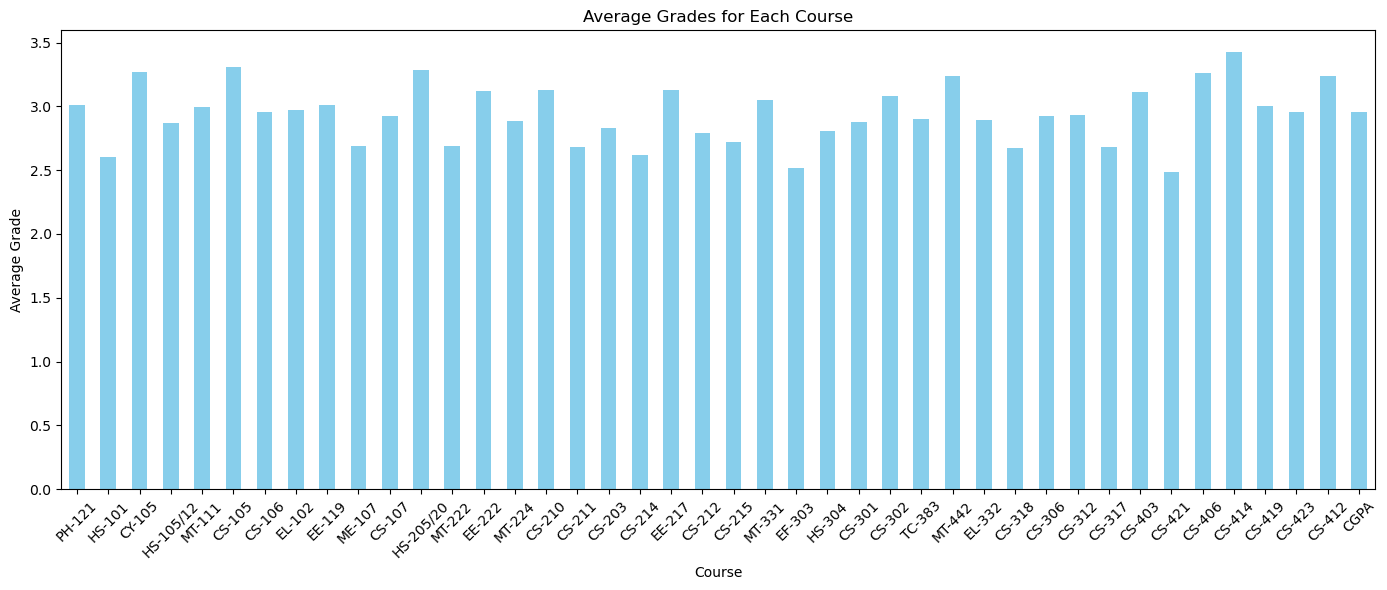

In [108]:
grades_df = df.drop(columns=['Seat No.'])
average_grades = grades_df.mean()
plt.figure(figsize=(14, 6))
average_grades.plot(kind='bar', color='skyblue')
plt.xlabel('Course')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Course')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### *These are the average CGPA according to their courses.*

In [109]:
df['Result'] = df['CGPA'].apply(lambda x: 1 if x >= 2.0 else 0)

print(df)


     Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001     2.7     1.3     1.7        2.0     1.7     1.3     1.0   
1    CS-97002     4.0     1.0     1.3        1.0     2.7     2.0     1.0   
2    CS-97003     4.0     3.0     4.0        2.7     3.3     4.0     2.7   
3    CS-97004     1.0     2.3     1.3        1.0     1.0     3.7     1.3   
4    CS-97005     3.7     3.7     3.7        3.3     4.0     4.0     3.7   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567     3.0     4.0     4.0        3.7     4.0     4.0     3.7   
567  CS-97568     4.0     4.0     4.0        4.0     4.0     4.0     4.0   
568  CS-97569     3.0     4.0     3.7        3.3     4.0     4.0     4.0   
569  CS-97570     4.0     3.3     1.0        4.0     1.0     1.3     2.7   
570  CS-97571     2.0     1.0     1.0        2.0     2.0     1.3     3.0   

     EL-102  EE-119  ...  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0       1.7

## I've augmented the DataFrame by introducing a new column named 'Result', where each entry denotes whether the student passed (1) or failed (0) based on their CGPA

# EDA - Exploratory Data Analysis

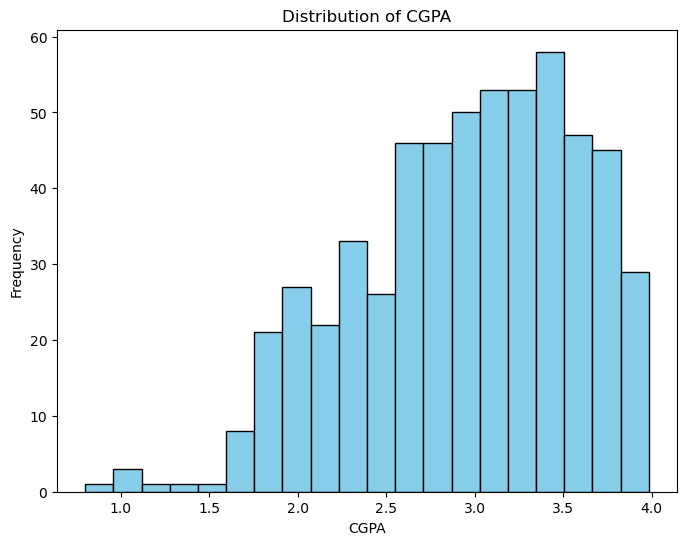

In [110]:
plt.figure(figsize=(8, 6))
plt.hist(df['CGPA'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()

### From above we can see maximum of students got 3.4 CGPA. And Average range of 2.5 - 3.8 CGPA. 


## Correlation 

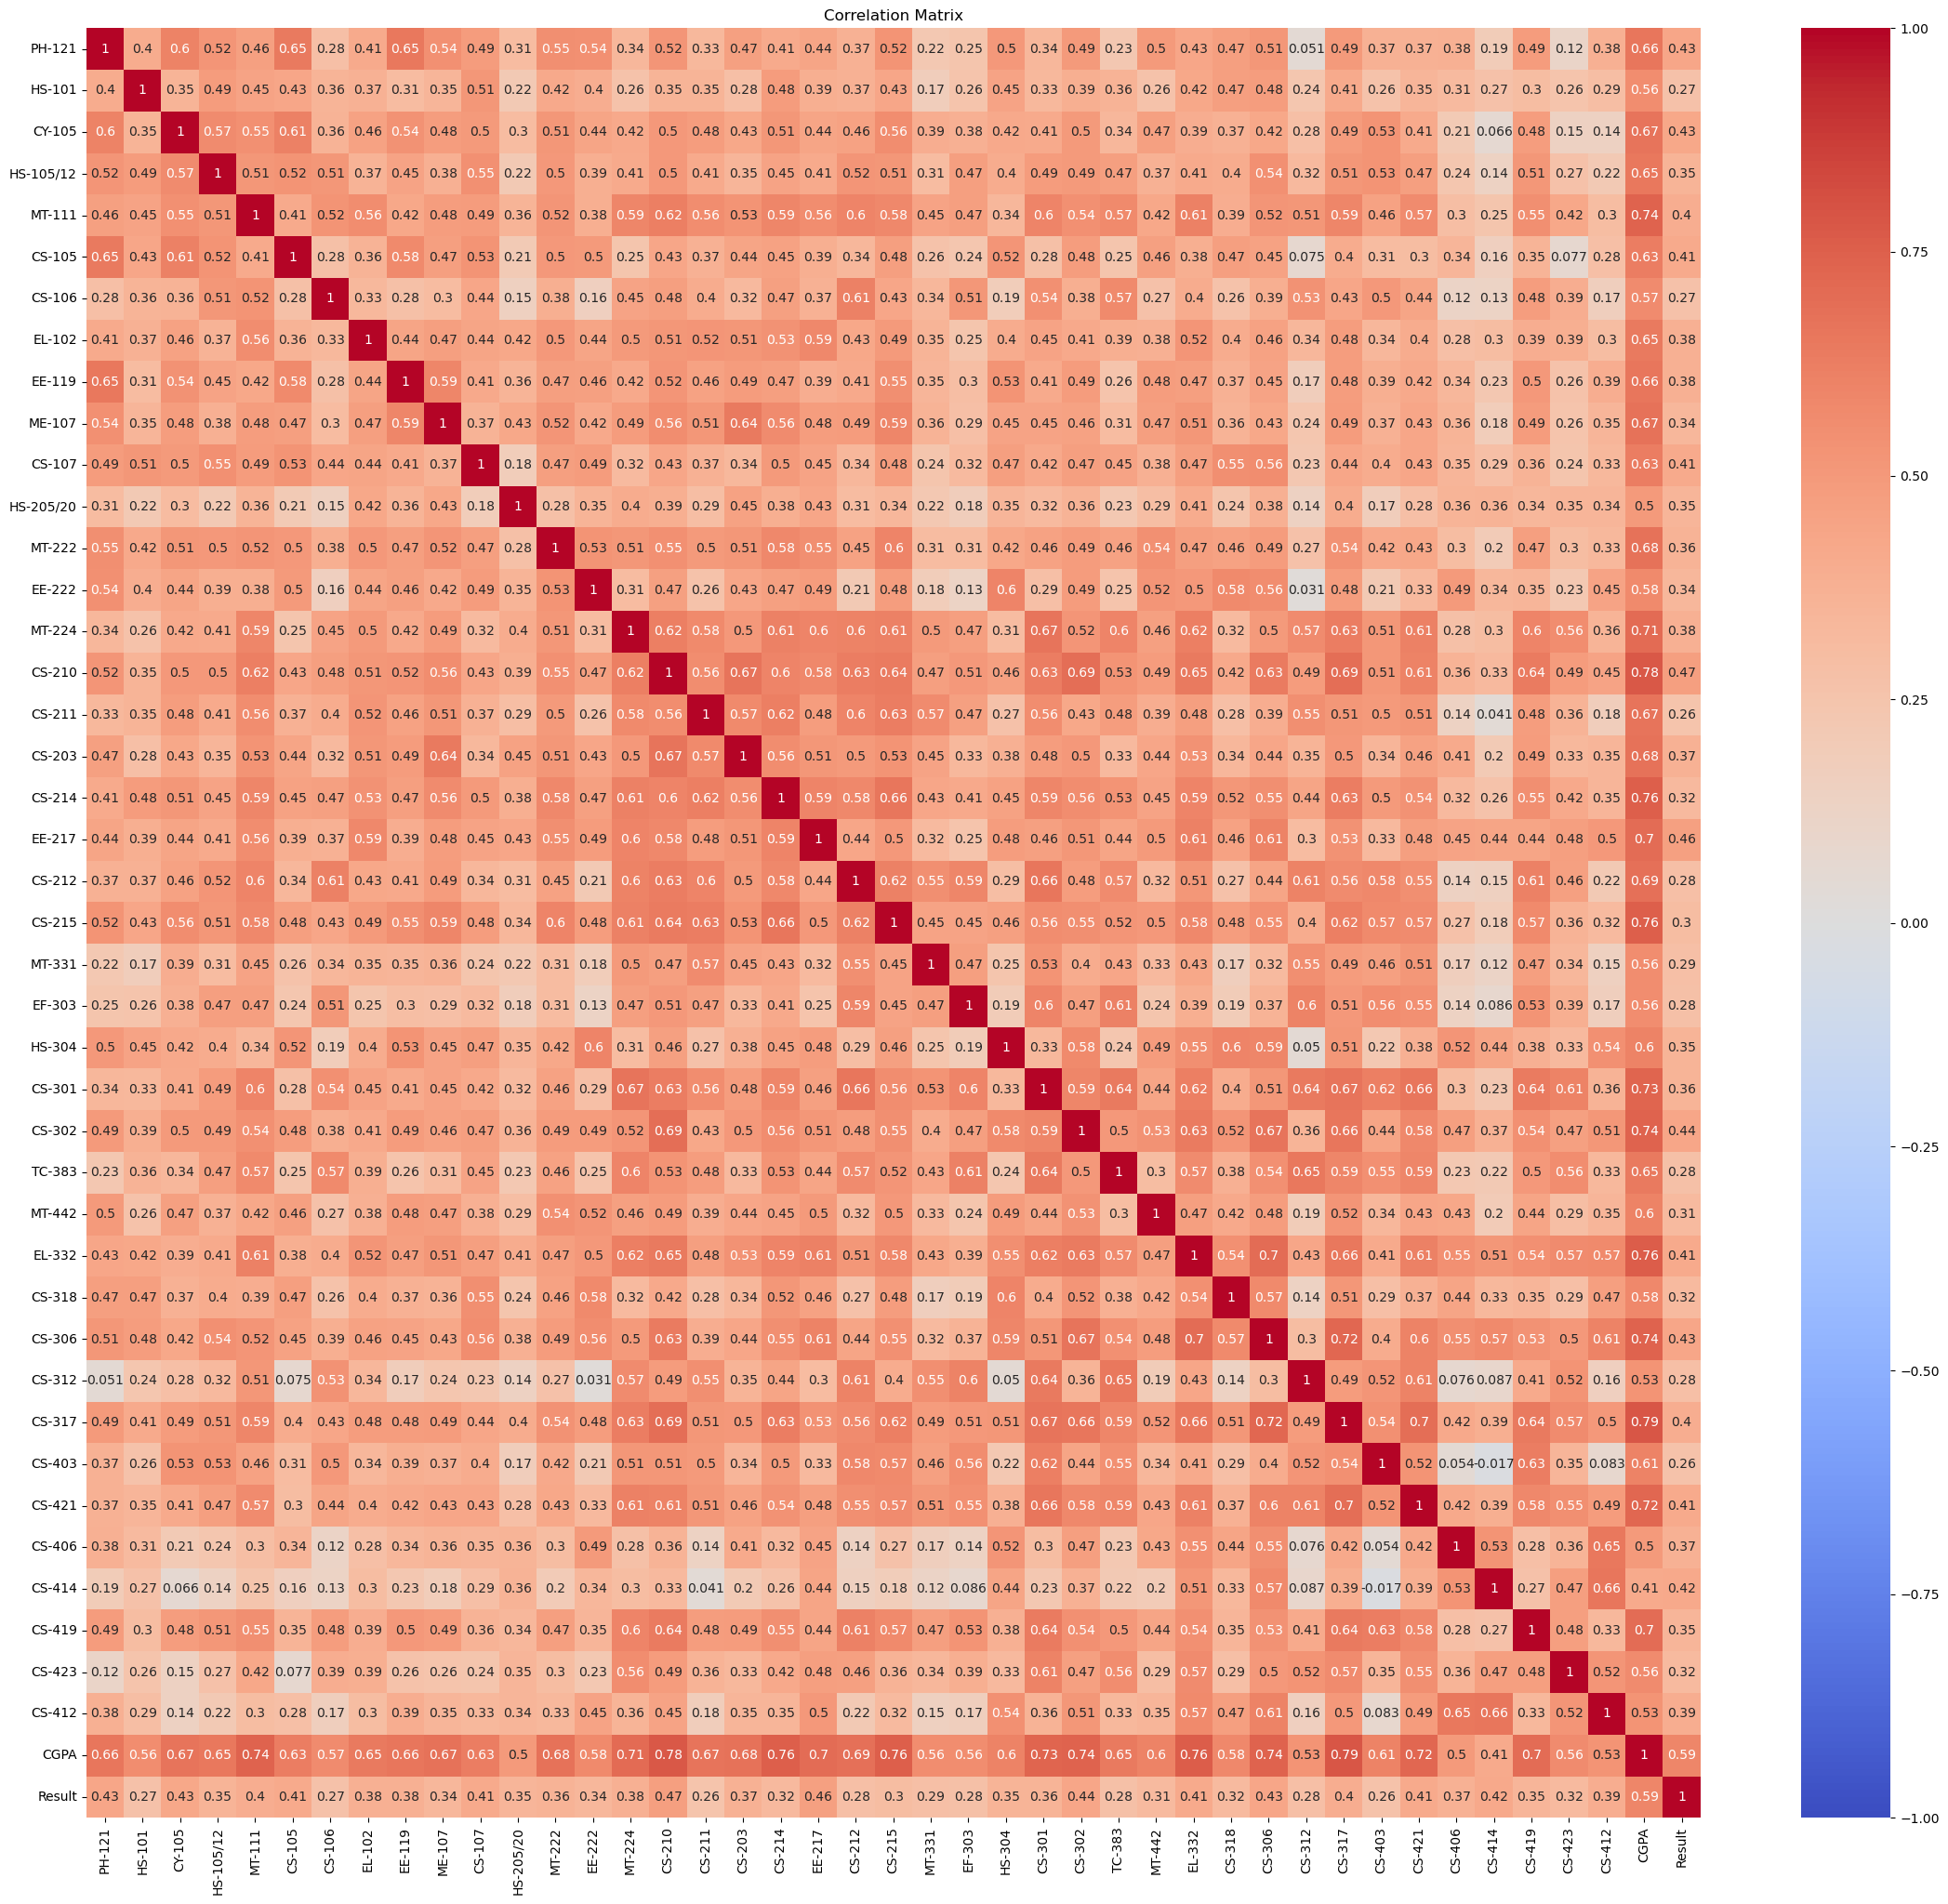

In [111]:
corr_matrix = df.corr()
plt.figure(figsize=(28, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

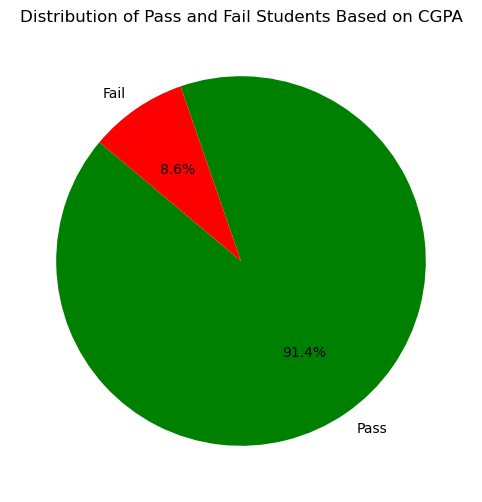

In [112]:
pass_threshold = 2.0
df['Result'] = df['CGPA'].apply(lambda x: 'Pass' if x >= pass_threshold else 'Fail')
result_counts = df['Result'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Distribution of Pass and Fail Students Based on CGPA')
plt.show()

### Students with a CGPA of 2.0 or higher are considered to have passed, while those below 2.0 are considered to have failed. 
1. FAIL = 8.6%
2. PASS = 91.4%

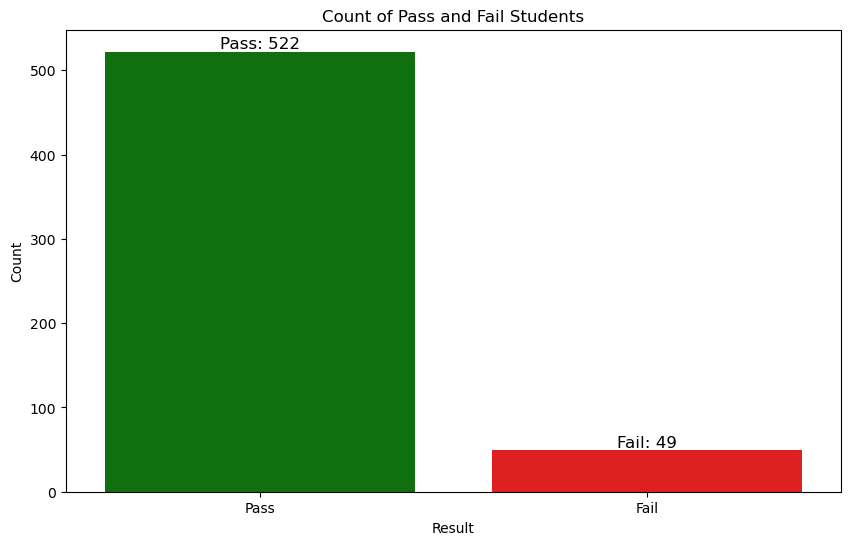

In [113]:
pass_threshold = 2.0
df['Result'] = df['CGPA'].apply(lambda x: 'Pass' if x >= pass_threshold else 'Fail')
pass_count = df[df['Result'] == 'Pass'].shape[0]
fail_count = df[df['Result'] == 'Fail'].shape[0]
plt.figure(figsize=(10, 6))
sns.countplot(x='Result', data=df, palette={'Pass': 'green', 'Fail': 'red'})
plt.title('Count of Pass and Fail Students')
plt.xlabel('Result')
plt.ylabel('Count')
plt.text(0, pass_count, f'Pass: {pass_count}', ha='center', va='bottom', fontsize=12, color='black')
plt.text(1, fail_count, f'Fail: {fail_count}', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

#### Countplot which differentiate the Pass and Fail student : Pass : 522          FAIL : 49

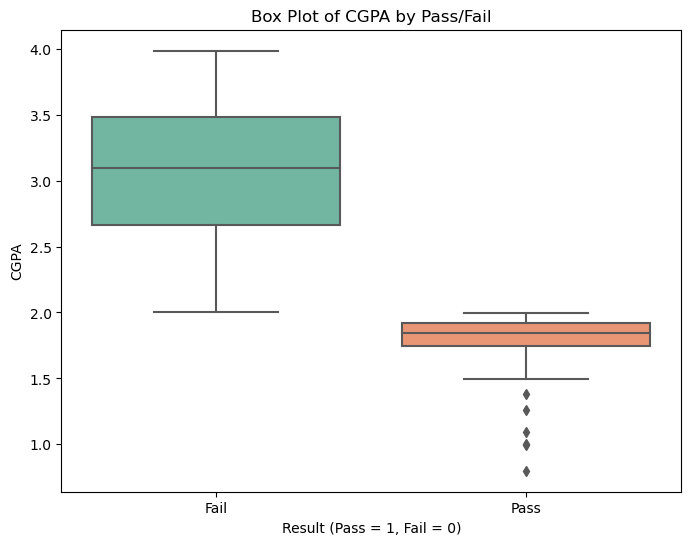

In [114]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Result', y='CGPA', data=df, palette='Set2')
plt.title('Box Plot of CGPA by Pass/Fail')
plt.xlabel('Result (Pass = 1, Fail = 0)')
plt.ylabel('CGPA')
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()

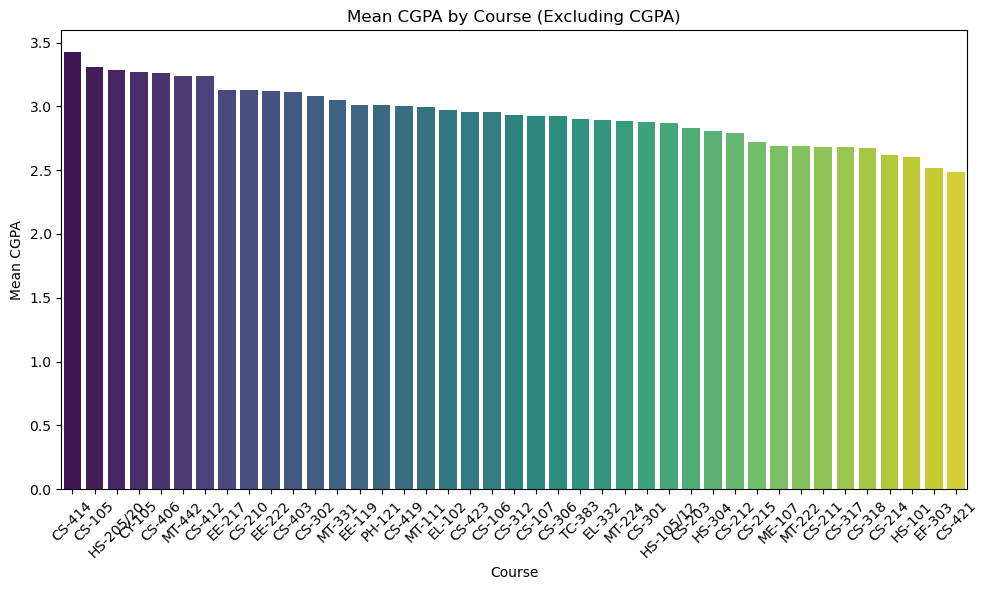

In [115]:
df2=df.copy()
df2.drop(columns=['Result'],inplace=True)
mean_cgpa = df2.drop(columns=['CGPA']).mean()
mean_cgpa_sorted = mean_cgpa.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_cgpa_sorted.index, y=mean_cgpa_sorted.values, palette='viridis')
plt.title('Mean CGPA by Course (Excluding CGPA)')
plt.xlabel('Course')
plt.ylabel('Mean CGPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The bar plot illustrates that courses with higher mean CGPA values generally indicate easier subjects, while those with lower mean CGPA values might be considered more challenging.

## Skewness

In [116]:
df.skew()

PH-121      -0.821456
HS-101      -0.208545
CY-105      -1.309465
HS-105/12   -0.527570
MT-111      -0.737270
CS-105      -1.240521
CS-106      -0.875916
EL-102      -0.741826
EE-119      -0.716199
ME-107      -0.324705
CS-107      -0.580079
HS-205/20   -1.332930
MT-222      -0.347510
EE-222      -1.065294
MT-224      -0.599306
CS-210      -0.974865
CS-211      -0.263033
CS-203      -0.478449
CS-214      -0.108720
EE-217      -0.994894
CS-212      -0.542506
CS-215      -0.294490
MT-331      -0.895795
EF-303      -0.293764
HS-304      -0.689868
CS-301      -0.607821
CS-302      -0.922862
TC-383      -0.483757
MT-442      -1.212134
EL-332      -0.780211
CS-318      -0.554412
CS-306      -0.725266
CS-312      -0.480144
CS-317      -0.395242
CS-403      -0.753489
CS-421      -0.501532
CS-406      -1.865415
CS-414      -2.029820
CS-419      -0.787581
CS-423      -0.815505
CS-412      -1.820999
CGPA        -0.497203
dtype: float64

In [122]:
df1=df.copy()

In [123]:
df1

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Result
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205,Pass
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008,Pass
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608,Pass
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906,Fail
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798,Pass
567,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772,Pass
568,CS-97569,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470,Pass
569,CS-97570,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193,Pass


In [124]:
df1.skew()

PH-121      -0.821456
HS-101      -0.208545
CY-105      -1.309465
HS-105/12   -0.527570
MT-111      -0.737270
CS-105      -1.240521
CS-106      -0.875916
EL-102      -0.741826
EE-119      -0.716199
ME-107      -0.324705
CS-107      -0.580079
HS-205/20   -1.332930
MT-222      -0.347510
EE-222      -1.065294
MT-224      -0.599306
CS-210      -0.974865
CS-211      -0.263033
CS-203      -0.478449
CS-214      -0.108720
EE-217      -0.994894
CS-212      -0.542506
CS-215      -0.294490
MT-331      -0.895795
EF-303      -0.293764
HS-304      -0.689868
CS-301      -0.607821
CS-302      -0.922862
TC-383      -0.483757
MT-442      -1.212134
EL-332      -0.780211
CS-318      -0.554412
CS-306      -0.725266
CS-312      -0.480144
CS-317      -0.395242
CS-403      -0.753489
CS-421      -0.501532
CS-406      -1.865415
CS-414      -2.029820
CS-419      -0.787581
CS-423      -0.815505
CS-412      -1.820999
CGPA        -0.497203
dtype: float64

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

In [126]:
from sklearn.preprocessing import PowerTransformer

# Numerical columns (excluding 'Seat No.' and 'Result')
numerical_columns = df1.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove('CGPA')  # Exclude target variable if present

# Skewness before transformation (optional)
skewness_before = df1[numerical_columns].skew()

# Apply PowerTransformer to reduce skewness
pt = PowerTransformer(method='yeo-johnson')
df1_skew_corrected = df1.copy()

# Transform numerical columns
df1_skew_corrected[numerical_columns] = pt.fit_transform(df1[numerical_columns])

# Skewness after transformation (optional)
skewness_after = df1_skew_corrected[numerical_columns].skew()

# Print skewness before and after transformation
print("Skewness Before Transformation:")
print(skewness_before)
print("\nSkewness After Transformation:")
print(skewness_after)

Skewness Before Transformation:
PH-121      -0.821456
HS-101      -0.208545
CY-105      -1.309465
HS-105/12   -0.527570
MT-111      -0.737270
CS-105      -1.240521
CS-106      -0.875916
EL-102      -0.741826
EE-119      -0.716199
ME-107      -0.324705
CS-107      -0.580079
HS-205/20   -1.332930
MT-222      -0.347510
EE-222      -1.065294
MT-224      -0.599306
CS-210      -0.974865
CS-211      -0.263033
CS-203      -0.478449
CS-214      -0.108720
EE-217      -0.994894
CS-212      -0.542506
CS-215      -0.294490
MT-331      -0.895795
EF-303      -0.293764
HS-304      -0.689868
CS-301      -0.607821
CS-302      -0.922862
TC-383      -0.483757
MT-442      -1.212134
EL-332      -0.780211
CS-318      -0.554412
CS-306      -0.725266
CS-312      -0.480144
CS-317      -0.395242
CS-403      -0.753489
CS-421      -0.501532
CS-406      -1.865415
CS-414      -2.029820
CS-419      -0.787581
CS-423      -0.815505
CS-412      -1.820999
dtype: float64

Skewness After Transformation:
PH-121      -0.3472

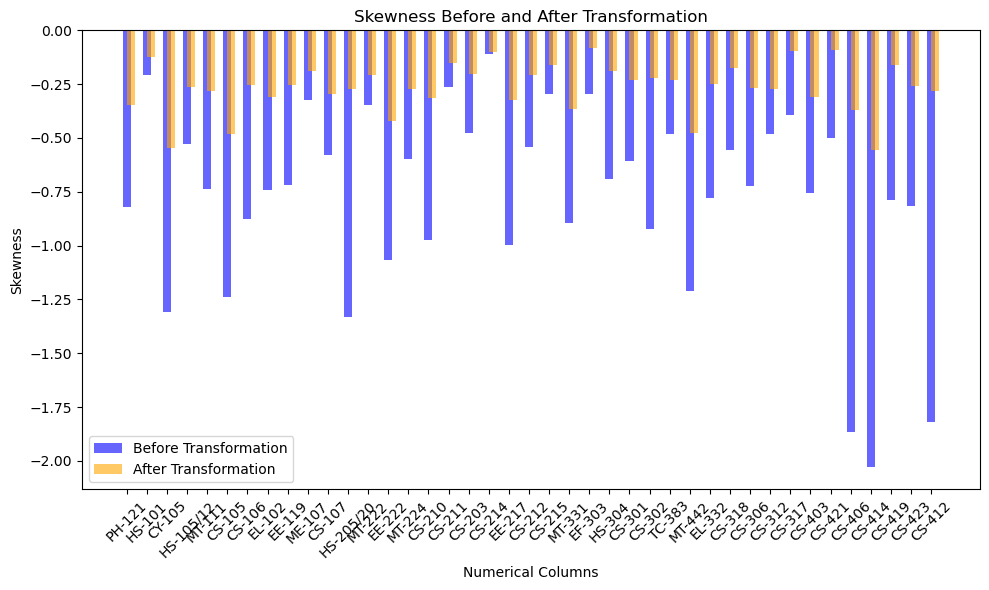

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, skewness_before, width=0.4, align='center', label='Before Transformation', color='blue', alpha=0.6)
plt.bar(numerical_columns, skewness_after, width=0.4, align='edge', label='After Transformation', color='orange', alpha=0.6)
plt.title('Skewness Before and After Transformation')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### After transformation the data is suitable for analyses and machine learning models. 

In [129]:
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
numerical_columns = df1.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove('CGPA')
pt = PowerTransformer(method='yeo-johnson')
df1[numerical_columns] = pt.fit_transform(df1[numerical_columns])
df1_encoded = pd.get_dummies(df1, columns=['Result'], drop_first=True)
le = LabelEncoder()
df1_encoded['Seat No.'] = le.fit_transform(df1_encoded['Seat No.'])
X = df1_encoded.drop(columns=['CGPA'])
y = df1_encoded['CGPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Machine learning models**

In [140]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

Linear Regression Mean Squared Error: 0.005483930614080992


In [131]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Regression Mean Squared Error:", mse_knn)

KNN Regression Mean Squared Error: 0.10719022852173914


In [132]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error: ",mse_rf)


Random Forest Mean Squared Error:  0.011312007374782612


In [133]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Mean Squared Error: ", mse_gb)


Gradient Boosting Mean Squared Error:  0.006881092064679954


In [134]:
#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR Mean Squared Error: ",mse_svr)


SVR Mean Squared Error:  0.011362944009672579


# r2_Score 

In [146]:
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R-squared Score:", r2_lr)

r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Regression R-squared Score:", r2_knn)

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R-squared Score:", r2_rf)

r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting R-squared Score:", r2_gb)

r2_svr = r2_score(y_test, y_pred_svr)
print("SVR R-squared Score:", r2_svr)

Linear Regression R-squared Score: 0.9835212264331966
KNN Regression R-squared Score: 0.677901923148301
Random Forest R-squared Score: 0.9660083211781682
Gradient Boosting R-squared Score: 0.9793228678468262
SVR R-squared Score: 0.9658552606579546


In [154]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
seat_number_to_predict = input("Enter the seat No. ")
# prediction on dummy data
data = {
    'Seat No.': [seat_number_to_predict],
    'PH-121': [0.821456],
    'HS-101': [0.208545],
    'CY-105': [1.309465],
    'CGPA': [3.497203]  
}
df = pd.DataFrame(data)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['PH-121', 'HS-101', 'CY-105']),
    ('cat', OneHotEncoder(), ['Seat No.'])
])

svr_model = SVR()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', svr_model)
])
pipeline.fit(df.drop(columns=['CGPA']), df['CGPA'])
predicted_cgpa = pipeline.predict(df.drop(columns=['CGPA']))

print("Predicted CGPA:", predicted_cgpa[0])



Enter the seat No. 134
Predicted CGPA: 3.497203
